## Generating Ml Model for Spam Classification of emails.

### Dataset is taken from: https://www.kaggle.com/datasets/balaka18/email-spam-classification-dataset-csv

### Email Spam Classification Dataset CSV
CSV file containing spam/not spam information about 5172 emails.

## Importing Required Libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Reading Csv file

## This dataset contains the count of number of words in email and target category according to that.

In [ ]:
df = pd.read_csv("/content/emails.csv")

# Printing First 7 rows of dataset
print("Dataset is:\n")
print(df.head(n = 7))

Dataset is:

  Email No.  the  to  ect  and  for  of    a  you  hou  ...  connevey  jay  \
0   Email 1    0   0    1    0    0   0    2    0    0  ...         0    0   
1   Email 2    8  13   24    6    6   2  102    1   27  ...         0    0   
2   Email 3    0   0    1    0    0   0    8    0    0  ...         0    0   
3   Email 4    0   5   22    0    5   1   51    2   10  ...         0    0   
4   Email 5    7   6   17    1    5   2   57    0    9  ...         0    0   
5   Email 6    4   5    1    4    2   3   45    1    0  ...         0    0   
6   Email 7    5   3    1    3    2   1   37    0    0  ...         0    0   

   valued  lay  infrastructure  military  allowing  ff  dry  Prediction  
0       0    0               0         0         0   0    0           0  
1       0    0               0         0         0   1    0           0  
2       0    0               0         0         0   0    0           0  
3       0    0               0         0         0   0    0       

## Seeing the Columns of Dataset

In [ ]:
print("Columns of Dataset are:\n", df.columns)

print("\nShape of Dataset is:", df.shape)

Columns of Dataset are:
 Index(['Email No.', 'the', 'to', 'ect', 'and', 'for', 'of', 'a', 'you', 'hou',
       ...
       'connevey', 'jay', 'valued', 'lay', 'infrastructure', 'military',
       'allowing', 'ff', 'dry', 'Prediction'],
      dtype='object', length=3002)

Shape of Dataset is: (5172, 3002)


## Checking for Null Values in Dataset

In [ ]:
print("Count of Null Values in Dataset is:\n")
df.isnull().sum()

Count of Null Values in Dataset is:



Email No.     0
the           0
to            0
ect           0
and           0
             ..
military      0
allowing      0
ff            0
dry           0
Prediction    0
Length: 3002, dtype: int64

## Since there are very less missing values we can drop them

In [ ]:
# Dropping Missing Values
df.dropna(inplace = True)

## Seeing Descriptive Statics of Dataset

In [ ]:
print("Descriptive Statics of Dataset are:\n")
df.describe(include = 'all')

Descriptive Statics of Dataset are:



,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
count,5172,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,...,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000
unique,5172,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Email 1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,6.640565,6.188128,5.143852,3.075599,3.124710,2.627030,55.517401,2.466551,2.024362,...,0.005027,0.012568,0.010634,0.098028,0.004254,0.006574,0.004060,0.914733,0.006961,0.290023
std,NaN,11.745009,9.534576,14.101142,6.045970,4.680522,6.229845,87.574172,4.314444,6.967878,...,0.105788,0.199682,0.116693,0.569532,0.096252,0.138908,0.072145,2.780203,0.098086,0.453817
min,NaN,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,12.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,NaN,3.000000,3.000000,1.000000,1.000000,2.000000,1.000000,28.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,NaN,8.000000,7.000000,4.000000,3.000000,4.000000,2.000000,62.250000,3.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000


## Seeing the Class label

In [ ]:
print("Unique Class Label in Dataset is:\n")
print(df['Prediction'].value_counts())

Unique Class Label in Dataset is:

0    3672
1    1500
Name: Prediction, dtype: int64


## We can see the dataset is imbalanced so first we need to balance it else it will lead to overfitting.

In [ ]:
# Extracting Not Spam Mail
Not_Spam = df[df['Prediction'] == 0]

# Since the count of Not Spam mail is more we will select the same number as that of spam mails
Not_Spam = Not_Spam.sample(n = 135)

# Extracting Spam Mail
Spam = df[df['Prediction'] == 1]

# Concatenating and Creating a New Dataset with the Same number of Spam and Not Spam Mails
df = pd.concat([Not_Spam, Spam], axis = 0)

# After Balancing Count of Class labels in dataset
print("After Balancing Count of Class labels in dataset is:\n")
print(df['Prediction'].value_counts())

After Balancing Count of Class labels in dataset is:

1    1500
0     135
Name: Prediction, dtype: int64


## Seeing the Data type in the dataset

In [ ]:
# Total Count of Datatypes
print("Datatype of Dataset is:")
df.info()

# According to Columns
data_types = df.dtypes

print("\nDatatypes of Columns is:\n")
print(data_types)

Datatype of Dataset is:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1635 entries, 1104 to 5170
Columns: 3002 entries, Email No. to Prediction
dtypes: int64(3001), object(1)
memory usage: 37.5+ MB

Datatypes of Columns is:

Email No.     object
the            int64
to             int64
ect            int64
and            int64
               ...  
military       int64
allowing       int64
ff             int64
dry            int64
Prediction     int64
Length: 3002, dtype: object


## Saving Updated Data into CSV File

In [ ]:
# Saving the dataframe as CSV file
df.to_csv("Updated_Emails.csv", index = False)

## Now we will use algorithm on this Dataset

In [ ]:
# Importing Algorithm and other evaluation metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

## Extracting Input and Output

In [ ]:
# Input Features
# Dropping Email No as it is an object column i.e it contains string values so we will drop it
X = df.drop(columns=['Email No.','Prediction'] , axis = 1)

# Output Features
Y = df['Prediction']

# Seeing Shape of Data
print("Shape of Input Data is:", X.shape)
print("\nShape of Output Data is:", Y.shape)

Shape of Input Data is: (1635, 3000)

Shape of Output Data is: (1635,)


# Splitting between Training and Testing Data

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, train_size= 0.8)

# Applying Algorithm

In [ ]:
dt = DecisionTreeClassifier()

# Training Model
dt.fit(x_train, y_train)

# Finding Predicted Values
dt_train_pred = dt.predict(x_train)

# Checking Accuracy for Training
print("Training Accuracy for Decision Tree Classifer is:", accuracy_score(y_train, dt_train_pred)*100)

print("\nConfusion Matrix is:\n", confusion_matrix(y_train, dt_train_pred))

print("\nClassification Report is:\n",classification_report(y_train, dt_train_pred))

Training Accuracy for Decision Tree Classifer is: 100.0

Confusion Matrix is:
 [[ 110    0]
 [   0 1198]]

Classification Report is:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       110
           1       1.00      1.00      1.00      1198

    accuracy                           1.00      1308
   macro avg       1.00      1.00      1.00      1308
weighted avg       1.00      1.00      1.00      1308



## Model Evaluation

In [ ]:
# Finding Predicted Values
dt_test_pred = dt.predict(x_test)

# Checking Accuracy for Training
print("Testing Accuracy for Decision Tree Classifer is:", accuracy_score(y_test, dt_test_pred)*100)

print("\nConfusion Matrix is:\n", confusion_matrix(y_test, dt_test_pred))

print("\nClassification Report is:\n",classification_report(y_test, dt_test_pred))

Testing Accuracy for Decision Tree Classifer is: 98.1651376146789

Confusion Matrix is:
 [[ 21   4]
 [  2 300]]

Classification Report is:
               precision    recall  f1-score   support

           0       0.91      0.84      0.87        25
           1       0.99      0.99      0.99       302

    accuracy                           0.98       327
   macro avg       0.95      0.92      0.93       327
weighted avg       0.98      0.98      0.98       327



## Data Visualization on this Dataset

## Importing PCA for data reduction

In [ ]:
# Importing PCA
from sklearn.decomposition import PCA

# Making Object of PCA
pca = PCA(n_components = 2 )

# PCA of Input Data
pca_data = pca.fit(X).transform(X)

## Visualization of Original Dataset

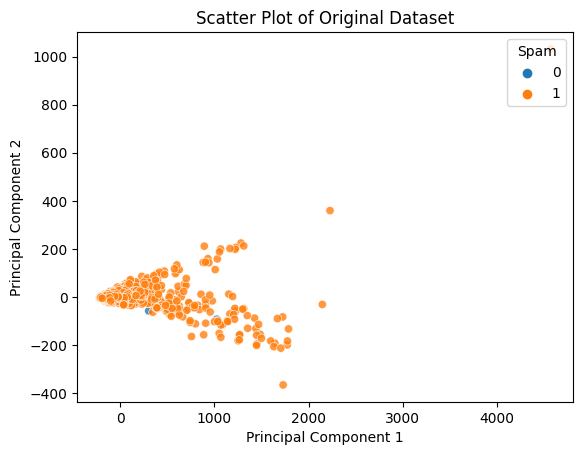

In [ ]:
sns.scatterplot(x = pca_data[:,0], y = pca_data[:,1] , data = pca_data, hue = Y, alpha=0.8)

# Adding Labels
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")

# Adding Title
plt.title("Scatter Plot of Original Dataset")

# Add a legend with a heading
legend = plt.legend(loc='upper right')
legend.set_title("Spam")

# For Training Set

Text(0.5, 0.98, 'Decision Tree Classifier Training Classification Plot')

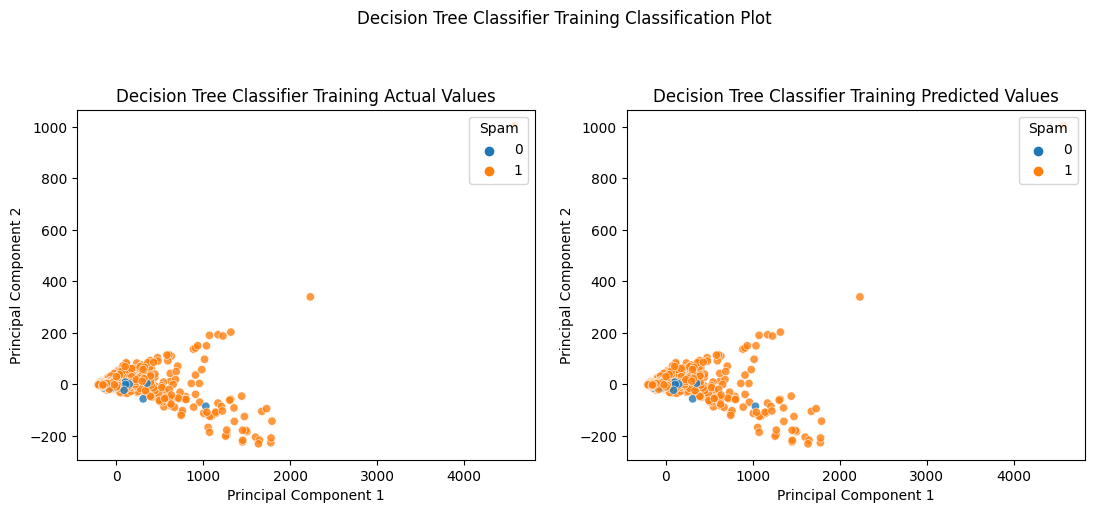

In [ ]:
# PCA of Input Data
pca_data = pca.fit(x_train).transform(x_train)

# Create a figure for the subplots
plt.figure(figsize=(13, 10))

plt.subplot(2,2,1)

# Plot 1
# Actual Values in Testing Set
sns.scatterplot(x = pca_data[:,0], y = pca_data[:,1] , data = pca_data, hue = y_train, alpha=0.8)

# Adding Labels
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")

# Adding Title
plt.title("Decision Tree Classifier Training Actual Values")

# Add a legend with a heading
legend = plt.legend(loc='upper right')
legend.set_title("Spam")

plt.subplot(2,2,2)
# Plot 2
# Predicted Values in Testing Set
sns.scatterplot(x = pca_data[:,0], y = pca_data[:,1] , data = pca_data, hue = dt_train_pred, alpha=0.8)

# Adding Labels
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")

# Adding Title
plt.title("Decision Tree Classifier Training Predicted Values")

# Add a legend with a heading
legend = plt.legend(loc='upper right')
legend.set_title("Spam")

# Adding title to plot
plt.suptitle("Decision Tree Classifier Training Classification Plot")

## For Testing Set

Text(0.5, 0.98, 'Decision Tree Classifier Testing Classification Plot')

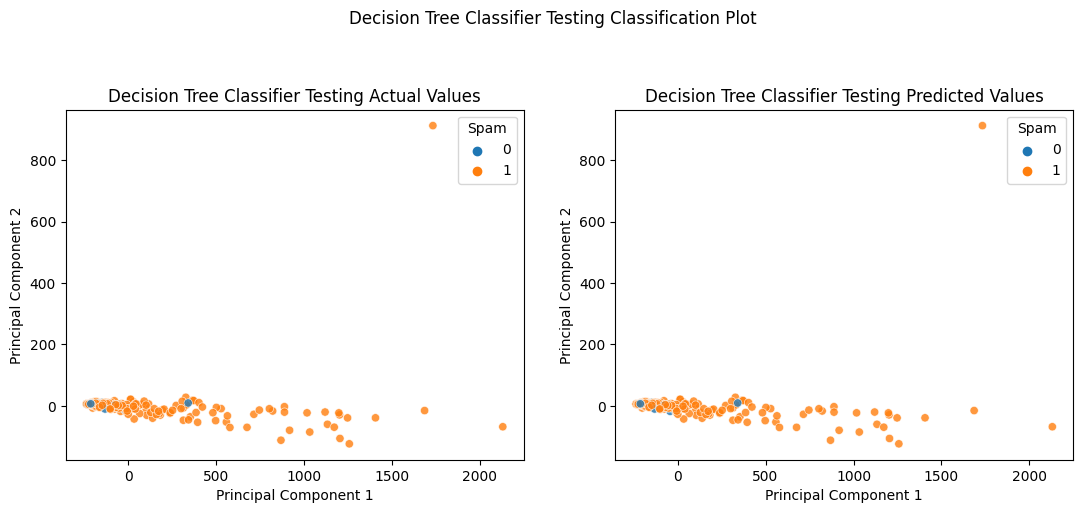

In [ ]:
# PCA of Input Data
pca_data = pca.fit(x_test).transform(x_test)

# Create a figure for the subplots
plt.figure(figsize=(13, 10))

plt.subplot(2,2,1)

# Plot 1
# Actual Values in Testing Set
sns.scatterplot(x = pca_data[:,0], y = pca_data[:,1] , data = pca_data, hue = y_test, alpha=0.8)

# Adding Labels
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")

# Adding Title
plt.title("Decision Tree Classifier Testing Actual Values")

# Add a legend with a heading
legend = plt.legend(loc='upper right')
legend.set_title("Spam")

plt.subplot(2,2,2)
# Plot 2
# Predicted Values in Testing Set
sns.scatterplot(x = pca_data[:,0], y = pca_data[:,1] , data = pca_data, hue = dt_test_pred, alpha=0.8)

# Adding Labels
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")

# Adding Title
plt.title("Decision Tree Classifier Testing Predicted Values")

# Add a legend with a heading
legend = plt.legend(loc='upper right')
legend.set_title("Spam")

# Adding title to plot
plt.suptitle("Decision Tree Classifier Testing Classification Plot")